In [6]:
import sys
import os
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from CareerTrajectory.careerTrajectory import getDistribution
from CareerTrajectory.careerTrajectory import getBinnedDistribution

# Overall impact distributions 

In [8]:
''' plot helper functions '''

def align_plot(ax):

    font_tick = 14   

    for i in range(len(ax)):
        for j in range(len(ax[0])):
            ax[i,j].legend(loc = 'left', fontsize = font_tick) 
            ax[i,j].spines['top'].set_visible(False)
            ax[i,j].spines['right'].set_visible(False)
            ax[i,j].get_xaxis().tick_bottom()
            ax[i,j].get_yaxis().tick_left()
            ticklines  = ax[i,j].get_xticklines()  + ax[i,j].get_yticklines()
            gridlines  = ax[i,j].get_xgridlines()  + ax[i,j].get_ygridlines()
            ticklabels = ax[i,j].get_xticklabels() + ax[i,j].get_yticklabels()
            for line in ticklines:
                line.set_linewidth(1)

            for line in gridlines:
                line.set_linestyle('-.')

            ax[i,j].tick_params(labelsize = font_tick) 

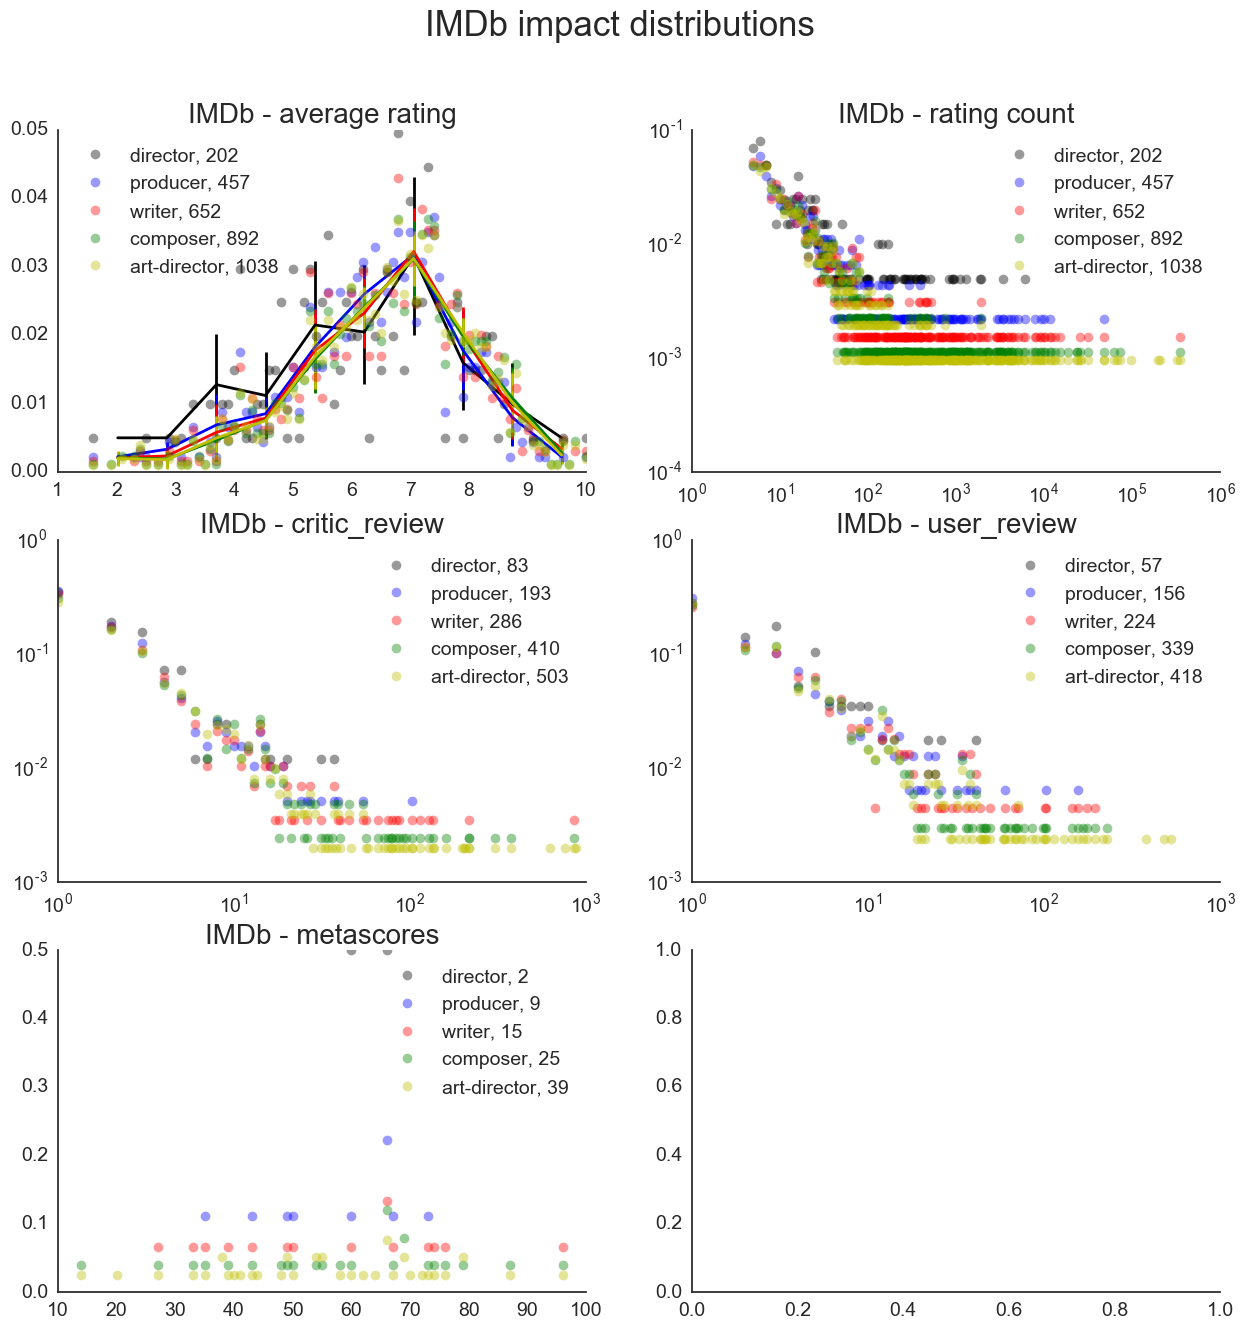

In [32]:
''' analyze the distributions '''

professions = [('director',     'k'), 
               ('producer',     'b'),
               ('writer'  ,     'r'),
               ('composer',     'g'),
               ('art-director', 'y')]

num_of_bins = 10
title_font  = 25 
seaborn.set_style('white')   
f, ax = plt.subplots(3, 2, figsize=(15, 15))
st = f.suptitle("IMDb impact distributions", fontsize=title_font)


for (label, color) in professions:

    
    file_avg  = 'ProcessedData/1_impact_distributions/film_average_ratings_dist_' + label + '.dat'
    file_cnt  = 'ProcessedData/1_impact_distributions/film_rating_counts_dist_'   + label + '.dat'
    file_mets = 'ProcessedData/1_impact_distributions/film_metascores_dist_'      + label + '.dat'
    file_crit = 'ProcessedData/1_impact_distributions/film_critic_review_dist_'   + label + '.dat'
    file_user = 'ProcessedData/1_impact_distributions/film_user_review_dist_'     + label + '.dat'

    average_ratings = np.asarray([float(line.strip()) for line in open(file_avg)])
    rating_counts   = np.asarray([float(line.strip()) for line in open(file_cnt)])
    metascores      = np.asarray([float(line.strip()) for line in open(file_mets)])
    critic_review   = np.asarray([float(line.strip()) for line in open(file_crit)])
    user_review     = np.asarray([float(line.strip()) for line in open(file_user)])
    
   
    
    # plot avg ratings
    x_average_ratings,  p_average_ratings = getDistribution(average_ratings, True)
    bx_average_ratings, bp_average_ratings, bperr_average_ratings = getBinnedDistribution(x_average_ratings, p_average_ratings, num_of_bins)

    ax[0,0].set_title('IMDb - average rating', fontsize = 20)
    ax[0,0].plot(x_average_ratings,  p_average_ratings, color + 'o', alpha = 0.4, label = label + ', ' + str(len(average_ratings)))
    ax[0,0].errorbar((bx_average_ratings[1:] + bx_average_ratings[:-1])/2, bp_average_ratings, yerr=bperr_average_ratings, fmt=color + '-', linewidth = 2)


    # plot rating counts  
    x_rating_counts,  p_rating_counts = getDistribution(rating_counts, True)
    bx_rating_counts, bp_rating_counts, bperr_rating_counts = getBinnedDistribution(x_rating_counts, p_rating_counts, num_of_bins)

    ax[0,1].set_title('IMDb - rating count', fontsize = 20)
    ax[0,1].set_xscale('log')
    ax[0,1].set_yscale('log')
    ax[0,1].plot(x_rating_counts,  p_rating_counts, color + 'o', alpha = 0.4, label = label + ', ' + str(len(rating_counts)))
    #ax[0,1].errorbar((bx_rating_counts[1:] + bx_rating_counts[:-1])/2, bp_rating_counts, yerr=bperr_rating_counts, fmt='b-', linewidth = 2)


    # plot metascores
    x_metascores,  p_metascores = getDistribution(metascores, True)
    ax[2,0].set_title('IMDb - metascores', fontsize = 20)
    ax[2,0].plot(x_metascores,  p_metascores, color + 'o', alpha = 0.4, label = label + ', ' + str(len(metascores)))


    # plot critic review count
    x_critic_review,  p_critic_review = getDistribution(critic_review, True)
    ax[1,0].set_title('IMDb - critic_review', fontsize = 20)
    ax[1,0].set_xscale('log')
    ax[1,0].set_yscale('log')
    ax[1,0].plot(x_critic_review, p_critic_review, color + 'o', alpha = 0.4, label = label + ', ' + str(len(critic_review)))


    # plot user review count
    x_user_review,  p_user_review = getDistribution(user_review, True)
    ax[1,1].set_title('IMDb - user_review', fontsize = 20)
    ax[1,1].set_xscale('log')
    ax[1,1].set_yscale('log')
    ax[1,1].plot(x_user_review, p_user_review, color + 'o', alpha = 0.4, label = label + ', ' + str(len(user_review)))


align_plot(ax)
#plt.savefig('impact_distributions.png')
#plt.close()
plt.show()
    
    



# Max impact distributions

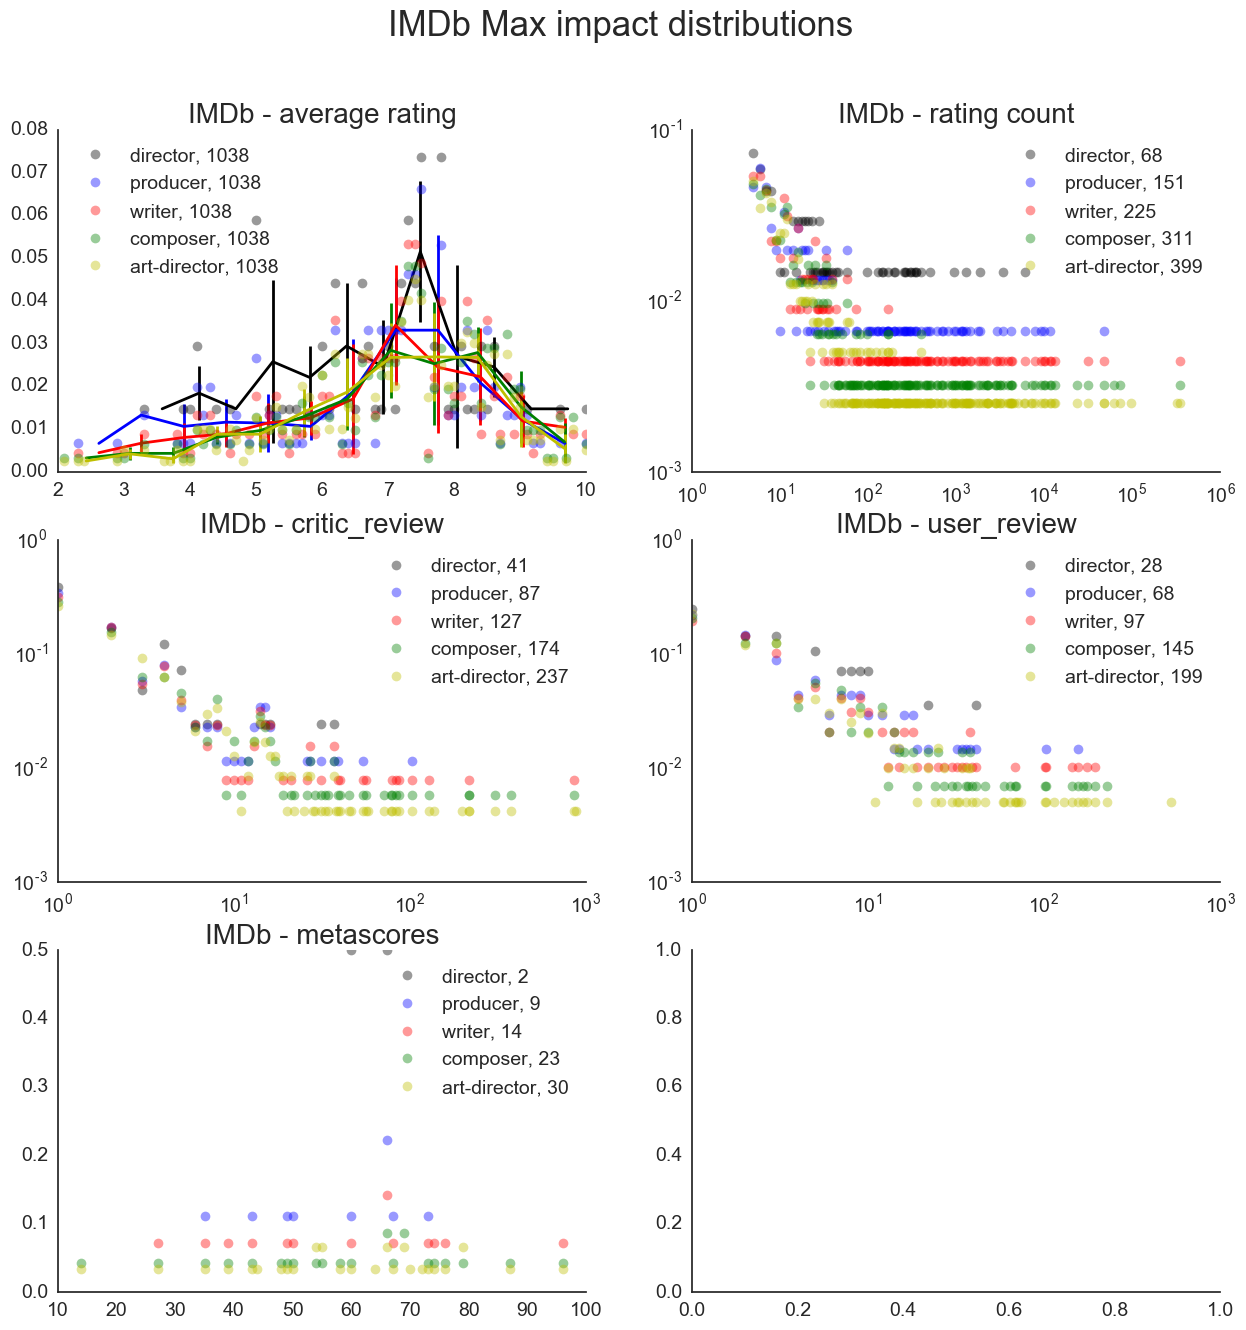

In [33]:
num_of_bins = 12
title_font = 25 
seaborn.set_style('white')   
f, ax = plt.subplots(3, 2, figsize=(15, 15))
st = f.suptitle("IMDb Max impact distributions", fontsize=title_font)


professions = [('director',     'k'), 
               ('producer',     'b'),
               ('writer'  ,     'r'),
               ('composer',     'g'),
               ('art-director', 'y')]    
    

for (label, color) in professions:

    
    file_max_avg  = 'ProcessedData/2_max_impact_distributions/film_max_average_ratings_dist_' + label + '.dat'
    file_max_cnt  = 'ProcessedData/2_max_impact_distributions/film_max_rating_counts_dist_'   + label + '.dat'
    file_max_mets = 'ProcessedData/2_max_impact_distributions/film_max_metascores_dist_'      + label + '.dat'
    file_max_crit = 'ProcessedData/2_max_impact_distributions/film_max_critic_review_dist_'   + label + '.dat'
    file_max_user = 'ProcessedData/2_max_impact_distributions/film_max_user_review_dist_'     + label + '.dat'

    max_average_ratings = np.asarray([float(line.strip()) for line in open(file_max_avg)])
    max_rating_counts   = np.asarray([float(line.strip()) for line in open(file_max_cnt)])
    max_metascores      = np.asarray([float(line.strip()) for line in open(file_max_mets)])
    max_critic_review   = np.asarray([float(line.strip()) for line in open(file_max_crit)])
    max_user_review     = np.asarray([float(line.strip()) for line in open(file_max_user)])

    
    # plot avg ratings
    x_max_average_ratings,  p_max_average_ratings = getDistribution(max_average_ratings, True)
    bx_max_average_ratings, bp_max_average_ratings, bperr_max_average_ratings = getBinnedDistribution(x_max_average_ratings, p_max_average_ratings, num_of_bins)

    ax[0,0].set_title('IMDb - average rating', fontsize = 20)
    ax[0,0].plot(x_max_average_ratings,  p_max_average_ratings, color + 'o', alpha = 0.4, label = label + ', ' + str(len(max_average_ratings)))
    ax[0,0].errorbar((bx_max_average_ratings[1:] + bx_max_average_ratings[:-1])/2, bp_max_average_ratings, yerr=bperr_max_average_ratings, fmt=color + '-', linewidth = 2)


    # plot rating counts  
    x_max_rating_counts,  p_max_rating_counts = getDistribution(max_rating_counts, True)
    bx_max_rating_counts, bp_max_rating_counts, bperr_max_rating_counts = getBinnedDistribution(x_max_rating_counts, p_max_rating_counts, num_of_bins)

    ax[0,1].set_title('IMDb - rating count', fontsize = 20)
    ax[0,1].set_xscale('log')
    ax[0,1].set_yscale('log')
    ax[0,1].plot(x_max_rating_counts,  p_max_rating_counts, color + 'o', alpha = 0.4, label = label + ', ' + str(len(max_rating_counts)))


    # plot metascores
    x_max_metascores,  p_max_metascores = getDistribution(max_metascores, True)
    ax[2,0].set_title('IMDb - metascores', fontsize = 20)
    ax[2,0].plot(x_max_metascores,  p_max_metascores, color + 'o', alpha = 0.4, label = label + ', ' + str(len(max_metascores)))


    # plot critic review count
    x_max_critic_review,  p_max_critic_review = getDistribution(max_critic_review, True)
    ax[1,0].set_title('IMDb - critic_review', fontsize = 20)
    ax[1,0].set_xscale('log')
    ax[1,0].set_yscale('log')
    ax[1,0].plot(x_max_critic_review, p_max_critic_review, color + 'o', alpha = 0.4, label = label + ', ' + str(len(max_critic_review)))


    # plot user review count
    x_max_user_review,  p_max_user_review = getDistribution(max_user_review, True)
    ax[1,1].set_title('IMDb - user_review', fontsize = 20)
    ax[1,1].set_xscale('log')
    ax[1,1].set_yscale('log')
    ax[1,1].plot(x_max_user_review, p_max_user_review, color + 'o', alpha = 0.4, label = label + ', ' + str(len(max_user_review)))



align_plot(ax)
plt.show() 



# Inflation curves

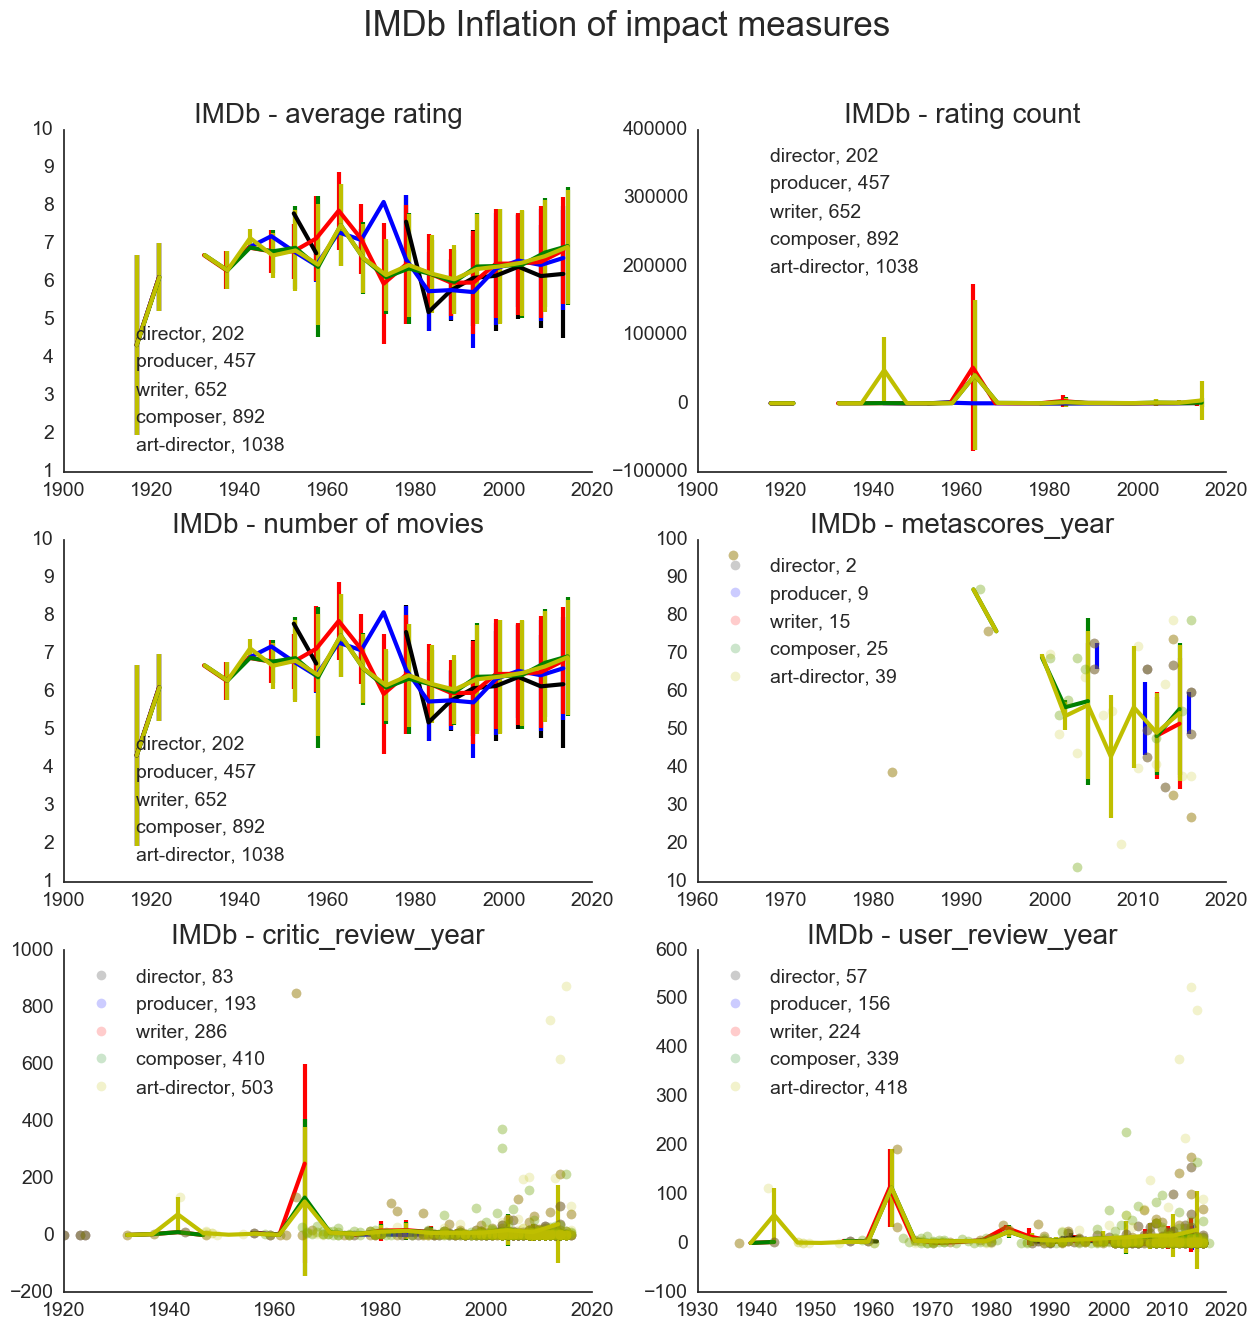

In [63]:
def get_dict_data(impacts):
    x = []
    y = []
    for i in impacts:
        field = i.split('\t')
        x.append(float(field[0]))
        y.append(float(field[1]))

    return np.asarray(x), np.asarray(y)



num_of_bins = 20
title_font = 25 
seaborn.set_style('white')   
f, ax = plt.subplots(3, 2, figsize=(15, 15))
st = f.suptitle("IMDb Inflation of impact measures", fontsize=title_font)


professions = [('director',     'k'), 
               ('producer',     'b'),
               ('writer'  ,     'r'),
               ('composer',     'g'),
               ('art-director', 'y')]    
    

for (label, color) in professions:

    
    file_avg_year  = 'ProcessedData/3_inflation_curves/film_yearly_average_ratings_dist_' + label + '.dat'
    file_cnt_year  = 'ProcessedData/3_inflation_curves/film_yearly_rating_counts_dist_'   + label + '.dat'
    file_mets_year = 'ProcessedData/3_inflation_curves/film_yearly_metascores_dist_'      + label + '.dat'
    file_crit_year = 'ProcessedData/3_inflation_curves/film_yearly_critic_review_dist_'   + label + '.dat'
    file_user_year = 'ProcessedData/3_inflation_curves/film_yearly_user_review_dist_'     + label + '.dat'

    average_ratings_year = np.asarray([line.strip() for line in open(file_avg_year)])
    rating_counts_year   = np.asarray([line.strip() for line in open(file_cnt_year)])
    metascores_year      = np.asarray([line.strip() for line in open(file_mets_year)])
    critic_review_year   = np.asarray([line.strip() for line in open(file_crit_year)])
    user_review_year     = np.asarray([line.strip() for line in open(file_user_year)])
    
    
    # plot average ratings
    x_average_ratings_year, y_average_ratings_year = get_movie_numbers(average_ratings_year)       
    bx_average_ratings_year, bp_average_ratings_year, bperr_average_ratings_year = getBinnedDistribution(x_average_ratings_year, y_average_ratings_year, num_of_bins)

    ax[0,0].set_title('IMDb - average rating', fontsize = 20)
    ax[0,0].plot(x_average_ratings_year,  y_average_ratings_year, color + 'o', alpha = 0.001, label = label + ', ' + str(len(average_ratings_year)))
    ax[0,0].errorbar((bx_average_ratings_year[1:] + bx_average_ratings_year[:-1])/2, bp_average_ratings_year, yerr=bperr_average_ratings_year, fmt=color + '-', linewidth = 3)
    
    
    #plot rating counts
    x_rating_counts_year, y_rating_counts_year = get_dict_data(rating_counts_year)          
    bx_rating_counts_year, bp_rating_counts_year, bperr_rating_counts_year = getBinnedDistribution(x_rating_counts_year, y_rating_counts_year, num_of_bins)

    ax[0,1].set_title('IMDb - rating count', fontsize = 20)
    ax[0,1].plot(x_rating_counts_year,  y_rating_counts_year, color + 'o', alpha = 0.001, label = label + ', ' + str(len(rating_counts_year)))
    ax[0,1].errorbar((bx_rating_counts_year[1:] + bx_rating_counts_year[:-1])/2, bp_rating_counts_year, yerr=bperr_rating_counts_year, fmt=color + '-', linewidth = 3)       



    # plot number of movies
    x_num_of_movies_year,  y_num_of_movies_year = get_movie_numbers(average_ratings_year)       
    bx_num_of_movies_year, bp_num_of_movies_year, bperr_num_of_movies_year = getBinnedDistribution(x_num_of_movies_year, y_num_of_movies_year, num_of_bins)

    ax[1,0].set_title('IMDb - number of movies', fontsize = 20)
    ax[1,0].plot(x_num_of_movies_year,  y_num_of_movies_year, color + 'o', alpha = 0.001, label = label + ', ' + str(len(average_ratings_year)))
    ax[1,0].errorbar((bx_num_of_movies_year[1:] + bx_num_of_movies_year[:-1])/2, bp_num_of_movies_year, yerr=bperr_num_of_movies_year, fmt=color + '-', linewidth = 3)  


    
    # plot number of movies
    x_metascores_year,  y_metascores_year = get_movie_numbers(metascores_year)       
    bx_metascores_year, bp_metascores_year, bperr_metascores_year = getBinnedDistribution(x_metascores_year, y_metascores_year, num_of_bins)

    ax[1,1].set_title('IMDb - metascores_year', fontsize = 20)
    ax[1,1].plot(x_metascores_year,  y_metascores_year, color + 'o', alpha = 0.2, label = label + ', ' + str(len(metascores_year)))
    ax[1,1].errorbar((bx_metascores_year[1:] + bx_metascores_year[:-1])/2, bp_metascores_year, yerr=bperr_metascores_year, fmt=color + '-', linewidth = 3)  


    
    # plot critic reviews
    x_critic_review_year,  y_critic_review_year = get_movie_numbers(critic_review_year)       
    bx_critic_review_year, bp_critic_review_year, bperr_critic_review_year = getBinnedDistribution(x_critic_review_year, y_critic_review_year, num_of_bins)

    
    ax[2,0].set_title('IMDb - critic_review_year', fontsize = 20)
    ax[2,0].plot(x_critic_review_year,  y_critic_review_year, color + 'o', alpha = 0.2, label = label + ', ' + str(len(critic_review_year)))
    ax[2,0].errorbar((bx_critic_review_year[1:] + bx_critic_review_year[:-1])/2, bp_critic_review_year, yerr=bperr_critic_review_year, fmt=color + '-', linewidth = 3)  



    # plot user reviews
    x_user_review_year,  y_user_review_year = get_movie_numbers(user_review_year)       
    bx_user_review_year, bp_user_review_year, bperr_user_review_year = getBinnedDistribution(x_user_review_year, y_user_review_year, num_of_bins)

    ax[2,1].set_title('IMDb - user_review_year', fontsize = 20)
    ax[2,1].plot(x_user_review_year,  y_user_review_year, color + 'o', alpha = 0.2, label = label + ', ' + str(len(user_review_year)))
    ax[2,1].errorbar((bx_user_review_year[1:] + bx_user_review_year[:-1])/2, bp_user_review_year, yerr=bperr_user_review_year, fmt=color + '-', linewidth = 3)  
    

    
    
align_plot(ax)    
plt.show()